In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_column',None)
from random import sample
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA


In [2]:
data=pd.read_csv('USArrests.csv')

In [3]:
data.head()

,State,Murder,Assault,UrbanPop,Rape,sil_score
0,Alabama,13.2,236,58,21.2,0.485775
1,Alaska,10.0,263,48,44.5,0.058252
2,Arizona,8.1,294,80,31.0,0.415483
3,Arkansas,8.8,190,50,19.5,0.118709
4,California,9.0,276,91,40.6,0.435559


In [5]:
data.shape

(50, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      50 non-null     object 
 1   Murder     50 non-null     float64
 2   Assault    50 non-null     int64  
 3   UrbanPop   50 non-null     int64  
 4   Rape       50 non-null     float64
 5   sil_score  50 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.5+ KB


In [7]:
data=data.set_index('State')

In [8]:
data.head()

,Murder,Assault,UrbanPop,Rape,sil_score
State,,,,,
Alabama,13.2,236,58,21.2,0.485775
Alaska,10.0,263,48,44.5,0.058252
Arizona,8.1,294,80,31.0,0.415483
Arkansas,8.8,190,50,19.5,0.118709
California,9.0,276,91,40.6,0.435559


In [9]:
sample=data.sample(frac=0.20,replace=False,random_state=123)

In [10]:
len(sample)
sample

,Murder,Assault,UrbanPop,Rape,sil_score
State,,,,,
Hawaii,5.3,46,83,20.2,0.335259
Indiana,7.2,113,65,21.0,0.307631
New Mexico,11.4,285,70,32.1,0.327703
Washington,4.0,145,73,26.2,0.437123
Maine,2.1,83,51,7.8,0.544340
Alabama,13.2,236,58,21.2,0.485775
South Dakota,3.8,86,45,12.8,0.544407
Illinois,10.4,249,83,24.0,0.262780
New Jersey,7.4,159,89,18.8,0.376536


In [11]:
DM=pd.DataFrame(distance_matrix(sample.values,sample.values),index=sample.index,columns=sample.index)
round(DM,2)
DM.to_csv('DM2.csv')

In [12]:
DM

State,Hawaii,Indiana,New Mexico,Washington,Maine,Alabama,South Dakota,Illinois,New Jersey,Florida
State,,,,,,,,,,
Hawaii,0.000000,69.406417,239.726553,99.693031,50.567220,191.803109,55.687106,203.099619,113.187330,289.428585
Indiana,69.406417,0.000000,172.481449,33.545443,36.004250,123.345335,34.754224,137.256118,51.931539,222.923871
New Mexico,239.726553,172.481449,0.000000,140.351637,204.553237,51.643731,201.634067,39.135843,128.179142,51.147286
Washington,99.693031,33.545443,140.351637,0.000000,68.338726,92.820485,66.667920,104.698760,22.766723,190.555719
Maine,50.567220,36.004250,204.553237,68.338726,0.000000,154.145300,8.537564,170.033553,85.843568,255.152468
Alabama,191.803109,123.345335,51.643731,92.820485,154.145300,0.000000,151.089124,28.455750,83.243089,102.001872
South Dakota,55.687106,34.754224,201.634067,66.667920,8.537564,151.089124,0.000000,167.875190,85.521858,252.439007
Illinois,203.099619,137.256118,39.135843,104.698760,170.033553,28.455750,167.875190,0.000000,90.399408,86.558709
New Jersey,113.187330,51.931539,128.179142,22.766723,85.843568,83.243089,85.521858,90.399408,0.000000,176.897213


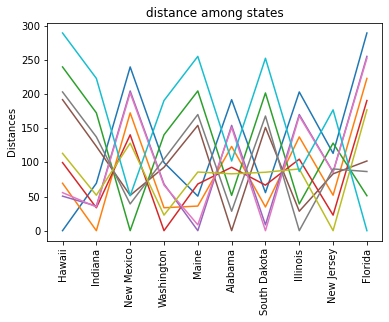

In [13]:
plt.plot(DM)
plt.ylabel('Distances')
plt.grid(False)
plt.xticks(rotation=90)
plt.title('distance among states')
plt.show()

In [17]:
data_scaled=StandardScaler().fit_transform(data)
data_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.98353112],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.89478211],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  0.51028776],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -1.48775094],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  0.64544729],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.08850964],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.75751408],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.04518929],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.54985538],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  0.21620801],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -0.0298244 ],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.38541301],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -0.51779156],
       [-0.13637203, -0.70012057, -0.0

C:\Users\SURESH A\Downloads\pythonnew\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


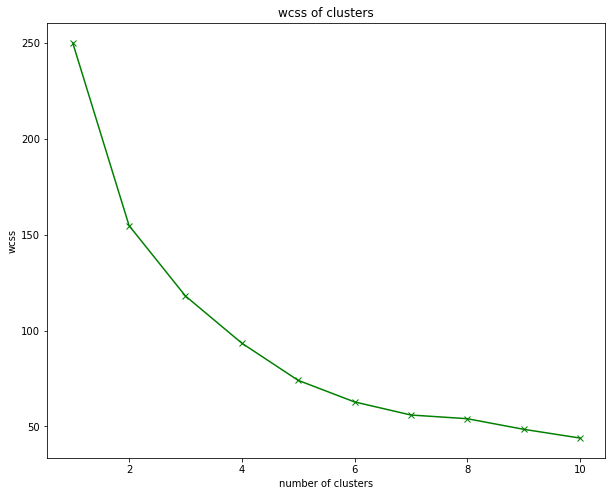

In [18]:
plt.figure(figsize=(10,8))

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= 'random', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss, 'gx-')
plt.title('wcss of clusters')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()
    

Clustering happened!

In [19]:
kmeans = KMeans(n_clusters=4)

#fitting the cluster to the backend(not fitted dataset here)
#clusters allocation

In [20]:
clusters=kmeans.fit_predict(data_scaled)
clusters

array([0, 3, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 1, 1, 1, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1])

Cluster Membership

In [21]:
Final_Clusters=clusters+1
cluster=list(Final_Clusters)
data['member']=cluster
data.head()

,Murder,Assault,UrbanPop,Rape,sil_score,member
State,,,,,,
Alabama,13.2,236,58,21.2,0.485775,1
Alaska,10.0,263,48,44.5,0.058252,4
Arizona,8.1,294,80,31.0,0.415483,4
Arkansas,8.8,190,50,19.5,0.118709,2
California,9.0,276,91,40.6,0.435559,4


Overall Silhouette Score


silhouette score_OVERALL

In [22]:
print(f'sill score(n=4) : {silhouette_score(data_scaled,cluster)}')

sill score(n=4) : 0.33631840100435817


Silhouette Score of each data point


In [23]:
sample_values=silhouette_samples(data_scaled,cluster)

sample_values is an array , convert to pdf

In [24]:
sample_values=pd.DataFrame(sample_values)

In [25]:
sample_values

,0
0,0.488442
1,0.134416
2,0.349808
3,0.131495
4,0.414228
5,0.329751
6,0.347236
7,0.232043
8,0.253339
9,0.385686


export to desktop

In [31]:
sample_values.to_csv('http://localhost:8888/edit/Downloads/sample_values.csv')

In [37]:
data1=pd.read_csv('CLSTUSA1.csv')

In [38]:
data1.head()

,State,Murder,Assault,UrbanPop,Rape,member,sil_score
0,Alabama,13.2,236,58,21.2,1,0.485775
1,Alaska,10.0,263,48,44.5,3,0.058252
2,Arizona,8.1,294,80,31.0,3,0.415483
3,Arkansas,8.8,190,50,19.5,1,0.118709
4,California,9.0,276,91,40.6,3,0.435559


In [39]:
data1=pd.DataFrame(data1)

Pattern of sil_score across clusters

Text(0.5, 1.0, 'Silhouette Scores')

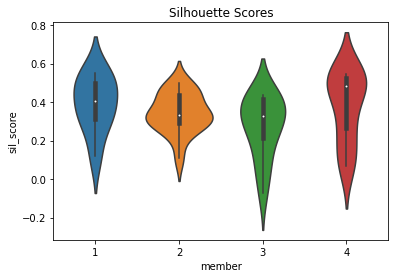

In [40]:
sns.violinplot(x='member',y='sil_score',data=data1)
plt.title('Silhouette Scores')

Text(0.5, 1.0, 'boxplot for silhouette score')

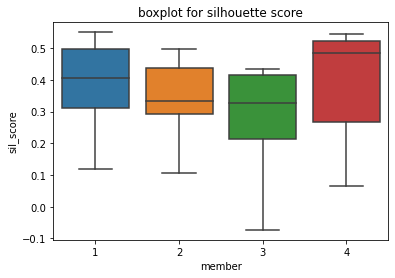

In [41]:
sns.boxplot(x='member',y='sil_score',data=data1)
plt.title('boxplot for silhouette score')

In [42]:
from sklearn.metrics import silhouette_samples

In [43]:
num_clusters = 4

sil score for each data point
do it again we had made DataFrame before

In [44]:
sample_values=silhouette_samples(data_scaled,cluster)

In [45]:
means_list=[]
for i in range(num_clusters):
    means_list.append(round(sample_values[i == clusters].mean(),2))
    print(means_list)

[0.41]
[0.41, 0.25]
[0.41, 0.25, 0.59]
[0.41, 0.25, 0.59, 0.28]


In [47]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

Text(0.5, 0, 'Silhouette coefficient')

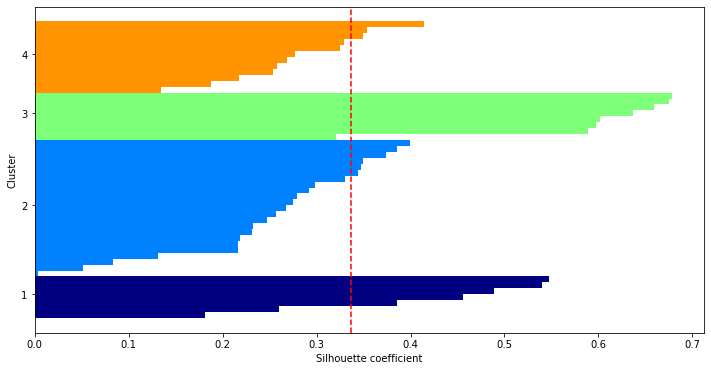

In [48]:
plt.figure(figsize=(12,6))
cluster_labels = np.unique(clusters)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data_scaled,clusters,metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')




In [49]:
data.groupby(data['member']).mean()

,Murder,Assault,UrbanPop,Rape,sil_score
member,,,,,
1,14.671429,251.285714,54.285714,21.685714,0.427817
2,5.808696,131.956522,69.608696,18.395652,0.277169
3,2.687500,72.000000,47.250000,10.425000,0.502239
4,10.966667,264.000000,76.500000,33.608333,0.299743


plotting the scatterplot

C:\Users\SURESH A\Downloads\pythonnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Murder', ylabel='Rape'>

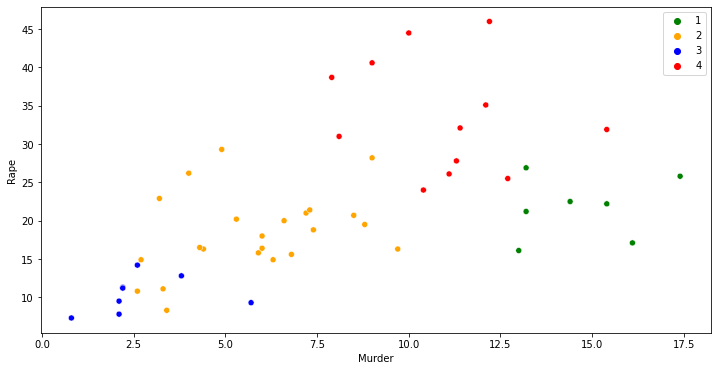

In [50]:
plt.figure(figsize=(12,6))
sns.scatterplot(data['Murder'],data['Rape'],hue=Final_Clusters,palette=['green','orange','blue','red'])